### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

### Importing Dataset

In [26]:
from tensorflow import keras
dataset = tf.keras.datasets.mnist

### Arranging data into training and test set

In [27]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

In [28]:
x_train.shape  # 60000 images of 28X28 px

(60000, 28, 28)

In [29]:
x_test.shape   # 10000 images of 28X28 px

(10000, 28, 28)

### Previewing data

In [30]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [31]:
y_train[0]

5

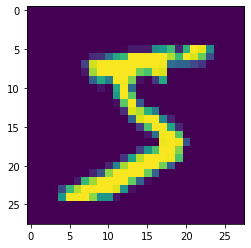

In [32]:
plt.imshow(x_train[0])

### Putting values in a range

In [33]:
x_train = x_train/255  # for balancing weights in ANN
x_test = x_test/255

In [34]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building model

##### Initializing model


In [35]:
model = tf.keras.models.Sequential()

##### Flattening layer

In [36]:
from tensorflow.keras.layers import Dense,Flatten

In [37]:
model.add(Flatten(input_shape=(28,28)))

##### Adding first layer

In [38]:
model.add(Dense(units=128,activation='relu'))

##### Adding second layer

In [39]:
model.add(Dense(units=32,activation='relu'))

### Adding Output layer

In [41]:
model.add(Dense(units='10',activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
Total params: 105,048
Trainable params: 105,048
Non-trainable params: 0
_________________________________________________________________


##### Compiling ANN

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##### Training ANN

In [51]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=50)

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9935 - val_loss: 0.1425 - val_accuracy: 0.9712
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0266 - accuracy: 0.9950 - val_loss: 0.1302 - val_accuracy: 0.9732
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0251 - accuracy: 0.9951 - val_loss: 0.1334 - val_accuracy: 0.9739
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0260 - accuracy: 0.9950 - val_loss: 0.1273 - val_accuracy: 0.9743
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0250 - accuracy: 0.9949 - val_loss: 0.1361 - val_accuracy: 0.9732
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0208 - accuracy: 0.9961 - val_loss: 0.1403 - val_accuracy: 0.9722
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0257 - accuracy: 0.9946 - val_loss: 0.1519 - val_accuracy:

In [52]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [53]:
y_pred = y_pred.argmax(axis=1)

In [54]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Checking accuracy

In [55]:
 from sklearn.metrics import accuracy_score
 accuracy_score(y_test,y_pred)   

0.9764

### Plotting Accuracy

Text(0.5, 1.0, 'Accuracy')

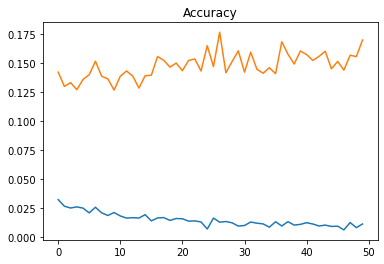

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy")

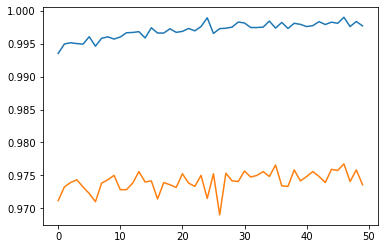

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Testing predicted results

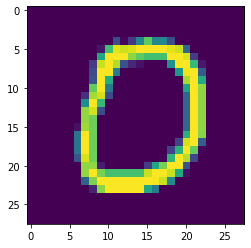

In [58]:
plt.imshow(np.squeeze(x_test[10]))

In [64]:
print(y_pred[10])

0


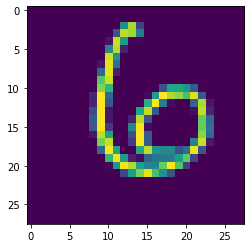

In [62]:
plt.imshow(np.squeeze(x_test[100]))

In [63]:
print(y_pred[100])

6
